In [1]:
import pandas as pd
from config import config
import numpy as np
import matplotlib.pyplot as plt
from pipeline import visualisation_pipeline
from pipeline import rf_pipeline, lr_pipeline, sm_rf_pipeline, sm_lr_pipeline
from helpers import get_meta_columns, plot_categoricial, plot_discrete, plot_continuous, train_models
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

In [2]:
def get_data():
    df = pd.read_csv(config.TRAIN_DIR, names=get_meta_columns(), na_values=' ?')
    # encodes the target variable as binary
    df[config.TARGET] = df[config.TARGET].map(config.TARGET_ENCODING)
    
    return df

data = get_data()
 
X_train, X_test, y_train, y_test = train_test_split(
         data[config.FEATURES], data[config.TARGET], test_size=0.2, random_state=0
         )  

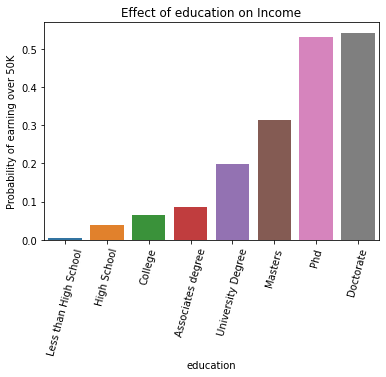

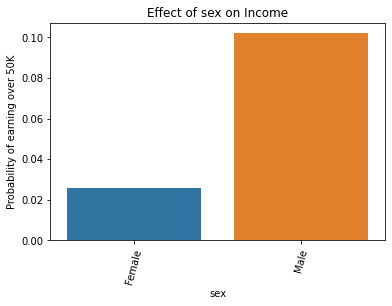

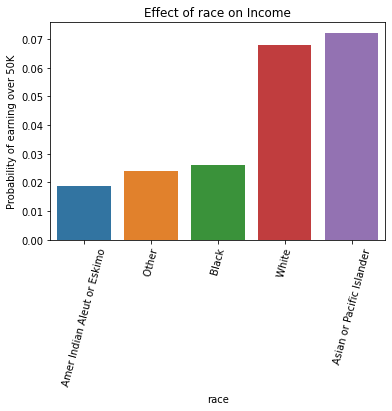

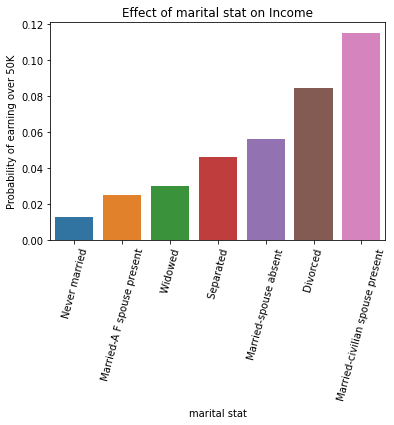

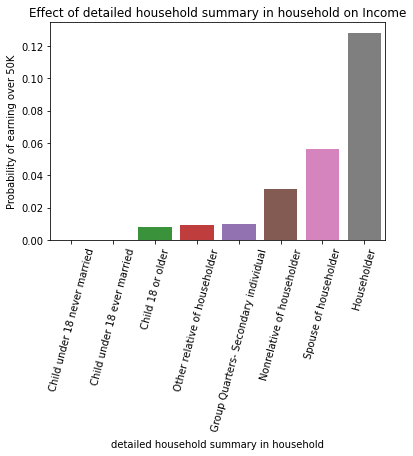

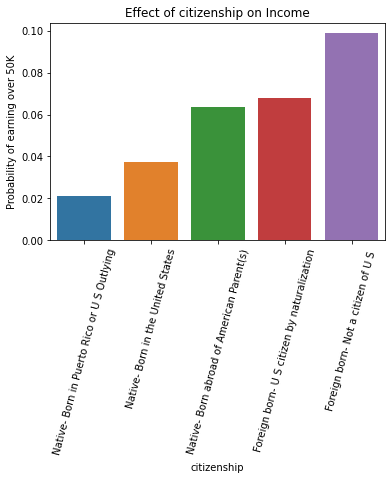

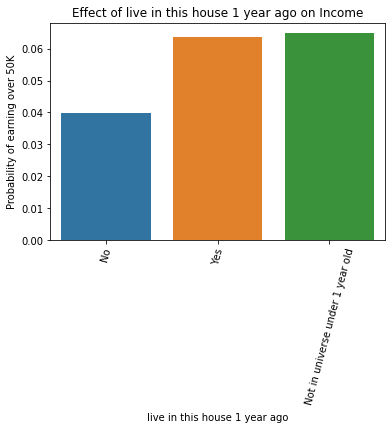

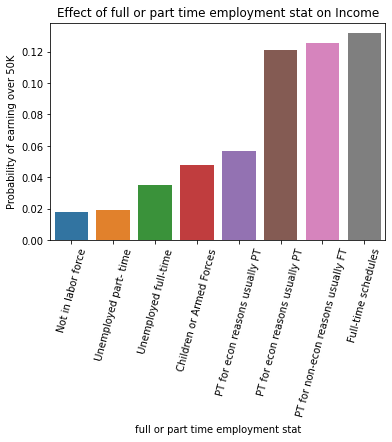

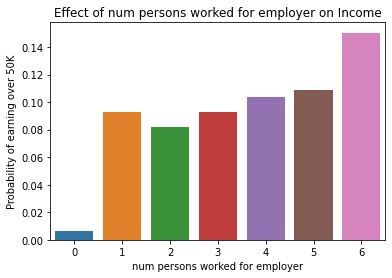

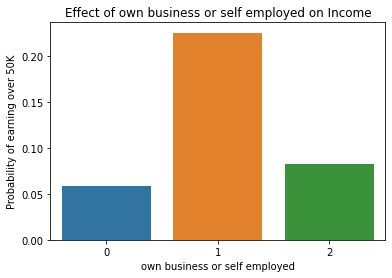

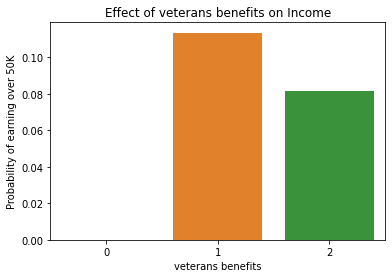

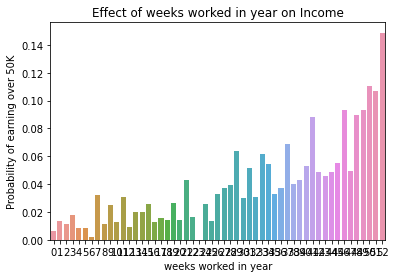

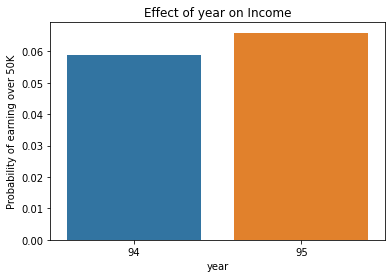

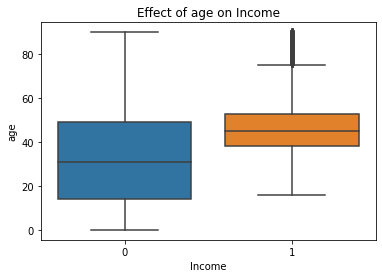

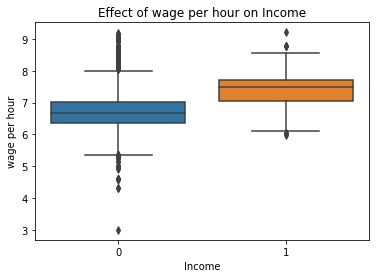

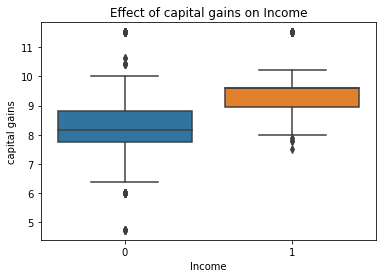

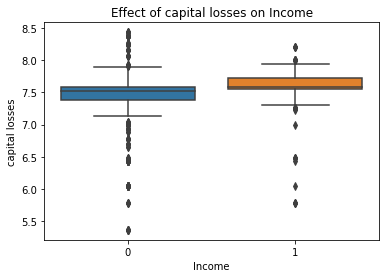

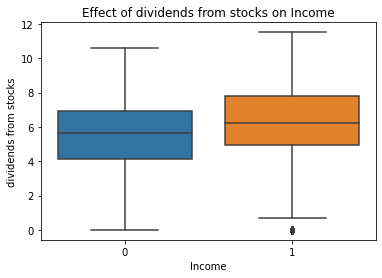

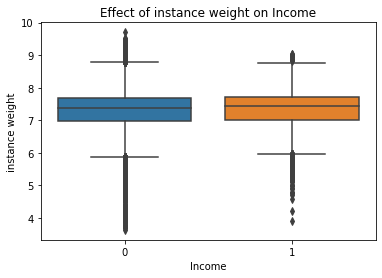

In [3]:
def run_visualisation(X_train, y_train):
    
    x_train_processed = visualisation_pipeline.fit_transform(X_train[config.FEATURES], y_train)
    plotting_df = pd.DataFrame(pd.concat([x_train_processed, y_train], axis=1))
    
    for var in config.CATEGORICAL_VALS:
        if var not in config.CATEGORICAL_VALS_NOT_PLOTTED:
            plot_categoricial(plotting_df, var)

    for var in config.DISCRETE_NUMERIC_VARS:
        if var not in config.DISCRETE_NOT_PLOTTED:
            plot_discrete(plotting_df, var)
    
    for var in config.CONTINUOUS_NUMERIC_VARS:
        plot_continuous(plotting_df, var)

run_visualisation(X_train, y_train)

In [4]:
models = {
	'Random_Forest': rf_pipeline,
	'Smote_Random_Forest': sm_rf_pipeline,
	'Logistic Regression': lr_pipeline,
	'Smote_Logistic_Regression': sm_lr_pipeline
    }

models = train_models(models, X_train, X_test, y_train, y_test)



                       Model  Accuracy  F1_Score  Recall_Score
0              Random_Forest  0.955169  0.536649      0.427569
1        Smote_Random_Forest  0.946999  0.565083      0.567066
2        Logistic Regression  0.950357  0.460071      0.348329
3  Smote_Logistic_Regression  0.846160  0.407490      0.871234


In [ ]:


param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'lr__penalty': ['l1', 'l2'],
		'lr__C': param_range_fl}] 

rf_grid_s = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1)

lr_grid_s = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=grid_params_lr,
    scoring='accuracy',
    cv=5,
    n_jobs=-1) 


 

